# About the Dataset
This dataset contains information about all the songs that were in Spotify top 200 charts since 2016. In addition to the number of streams and the number of weeks in the charts, it contains information about the audio features of each track, such as tempo, key and danceability.

The source of this technical information is the Spotify web API. More details about the construction of this dataset can be found at: https://github.com/JulianoOrlandi/Spotify_Top_Songs_and_Audio_Features.


# The problem
Find top songs that have most week charted to make propose song strategies for users. Identify artists and sources with the most charted songs to develop targeted advertisements.

### Import libraries

In [1]:
import pandas as pd

### Describe the dataset

In [2]:
pd.options.display.float_format = '{:,.0f}'.format

In [3]:
data = pd.read_csv('spotify_top_songs_audio_features.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6513 non-null   object 
 1   artist_names      6513 non-null   object 
 2   track_name        6513 non-null   object 
 3   source            6513 non-null   object 
 4   key               6513 non-null   object 
 5   mode              6513 non-null   object 
 6   time_signature    6513 non-null   object 
 7   danceability      6513 non-null   float64
 8   energy            6513 non-null   float64
 9   speechiness       6513 non-null   float64
 10  acousticness      6513 non-null   float64
 11  instrumentalness  6513 non-null   float64
 12  liveness          6513 non-null   float64
 13  valence           6513 non-null   float64
 14  loudness          6513 non-null   float64
 15  tempo             6513 non-null   float64
 16  duration_ms       6513 non-null   int64  


In [4]:
data.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
count,"6,513","6,513","6,513","6,513","6,513","6,513","6,513","6,513","6,513","6,513","6,513","6,513"
mean,1,1,0,0,0,0,0,-6,122,"202,567",14,"108,964,721"
std,0,0,0,0,0,0,0,3,29,"49,200",24,"227,669,471"
min,0,0,0,0,0,0,0,-34,47,"30,133",1,"2,525,159"
25%,1,1,0,0,0,0,0,-8,98,"173,038",1,"8,695,060"
50%,1,1,0,0,0,0,0,-6,120,"198,367",4,"27,128,557"
75%,1,1,0,0,0,0,1,-5,142,"226,003",16,"99,514,557"
max,1,1,1,1,1,1,1,2,212,"690,732",367,"3,528,450,184"


In [5]:
data.streams.sum()

709687227805

### Inspect the data

#### Tops songs have most charted weeks

In [6]:
top_songs = data.sort_values('weeks_on_chart', ascending = False).head(20)
top_songs[['track_name', 'artist_names', 'source', 'weeks_on_chart', 'streams']]

,track_name,artist_names,source,weeks_on_chart,streams
688,Believer,Imagine Dragons,Kid Ina Korner / Interscope,367,2120386471
748,Perfect,Ed Sheeran,Atlantic Records UK,363,2797600939
6383,Shape of You,Ed Sheeran,Atlantic Records UK,333,3509169565
752,lovely (with Khalid),"Billie Eilish, Khalid",Darkroom,308,2417312282
4946,Say You Won't Let Go,James Arthur,Columbia,297,1959283644
370,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",Republic Records,275,2063374994
6378,Someone You Loved,Lewis Capaldi,Vertigo Berlin,270,3029241037
5554,goosebumps,Travis Scott,Cactus Jack / Epic,238,1526733669
435,Blinding Lights,The Weeknd,Republic Records,224,3528450184
6318,Jocelyn Flores,XXXTENTACION,Bad Vibes Forever / EMPIRE,217,1514950341


#### Solo artists have most charted songs

In [7]:
top_artists = data.groupby('artist_names')[['track_name']].count().rename(columns = {'track_name': 'no_of_tracks'})

In [8]:
top_artists['avg_streams_per_track'] = data.groupby('artist_names')[['streams']].mean()

In [9]:
top_artists.sort_values('no_of_tracks', ascending = False).head(10)

,no_of_tracks,avg_streams_per_track
artist_names,,
Taylor Swift,175,"87,934,776"
Drake,111,"68,506,118"
BTS,71,"54,247,913"
Bad Bunny,70,"150,460,421"
Juice WRLD,60,"77,362,117"
Ariana Grande,60,"139,408,880"
Post Malone,56,"131,468,705"
Billie Eilish,53,"181,756,155"
The Weeknd,50,"223,680,091"


#### Sources have most charted songs

In [10]:
top_sources = data.groupby('source')[['track_name']].count().rename(columns = {'track_name': 'no_of_tracks'})

In [11]:
result = top_sources.sort_values('no_of_tracks', ascending = False).head(10)

<Axes: title={'center': 'Tpp 10 sources have most charted songs'}, xlabel='source'>

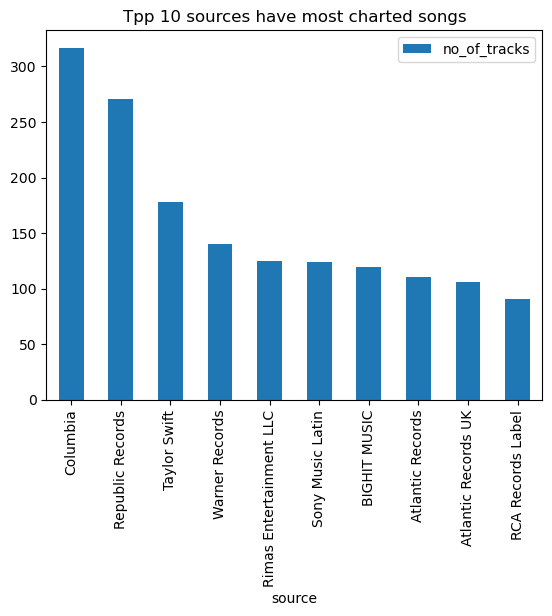

In [12]:
result.plot(kind = 'bar', title = 'Tpp 10 sources have most charted songs')